In [6]:
import json

import compare_clustering_solutions
import main

<Figure size 640x480 with 0 Axes>

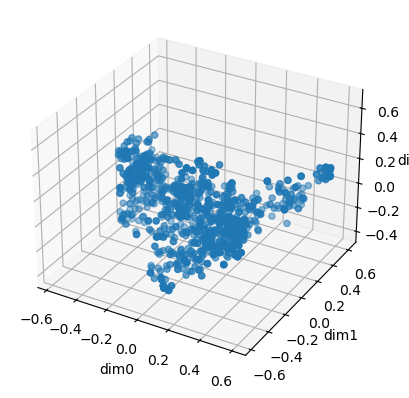

Iteration 1 done


<Figure size 640x480 with 0 Axes>

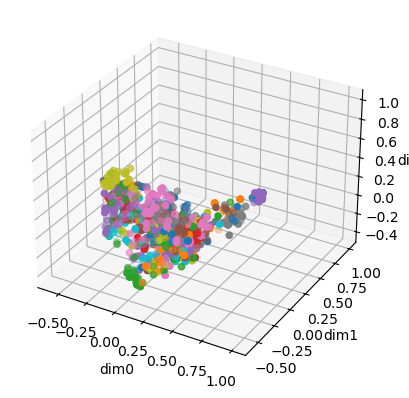

Iteration 2 done


<Figure size 640x480 with 0 Axes>

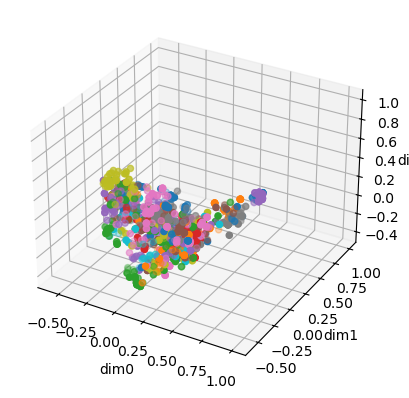

Iteration 3 done


<Figure size 640x480 with 0 Axes>

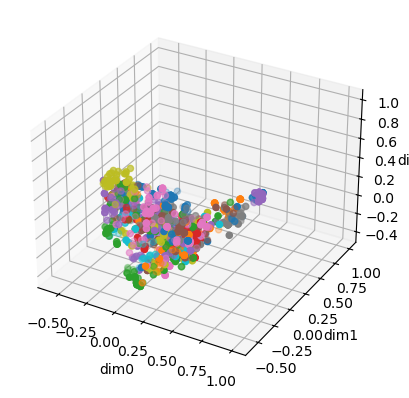

Iteration 4 done


<Figure size 640x480 with 0 Axes>

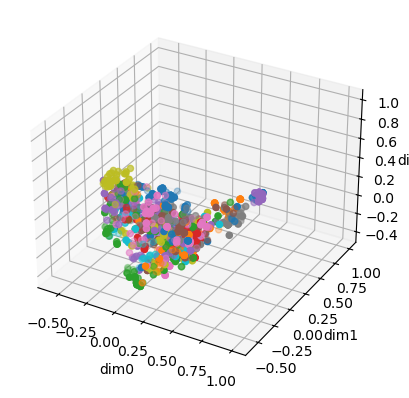

Iteration 5 done


<Figure size 640x480 with 0 Axes>

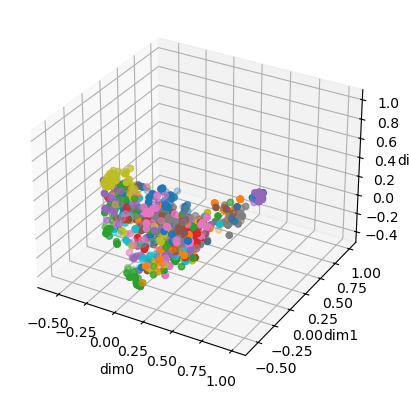

Iteration 6 done


<Figure size 640x480 with 0 Axes>

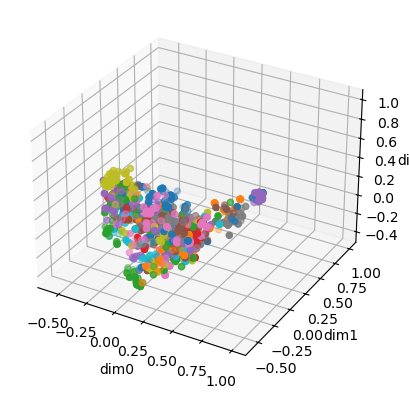

Iteration 7 done


<Figure size 640x480 with 0 Axes>

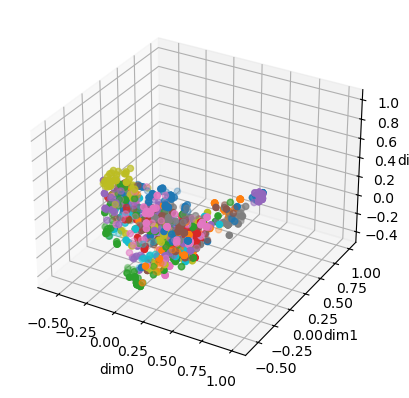

Iteration 8 done


<Figure size 640x480 with 0 Axes>

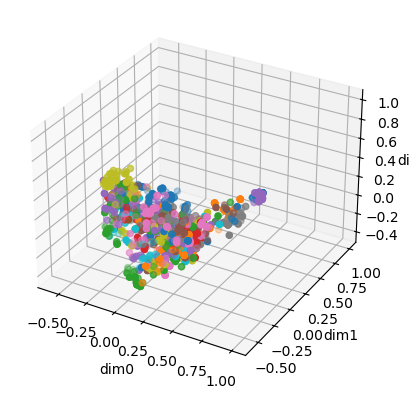

Converged after 9 iterations!


<Figure size 640x480 with 0 Axes>

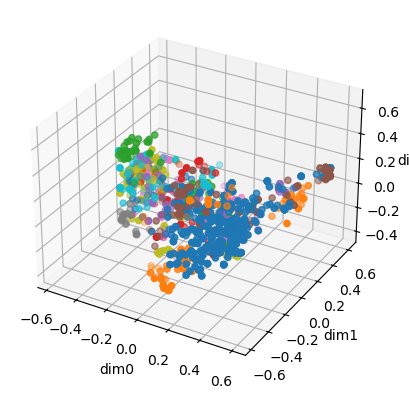

C:\Users\omere\AppData\Roaming\Python\Python311\site-packages\torch\distributions\distribution.py:53: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(


In [7]:
with open('config.json', 'r') as json_file:
    config = json.load(json_file)

main.analyze_unrecognized_requests(config['data_file'],
                                   config['output_file'],
                                   config['min_cluster_size'])

In [12]:
# clusters0, requests0, unclustered_len0 = compare_clustering_solutions.read_clusters(config['output_file'])
clusters0, requests0, unclustered_len0 = compare_clustering_solutions.read_clusters(config['example_solution_file'])

In [13]:
len(requests0)

1330

In [10]:
with open('config.json', 'r') as json_file:
    config = json.load(json_file)

# load the model
model = main.create_sentence_transformer_model()
# create dataframe of the data
df = main.read_lines(config['data_file'])
# encode the sentences to the dataframe
main.encode_sentences(df, model)
# create a dictionary of clusters
clusters = {}

# create visualization base
dims = 3
main.reduce_dimensions(df, dims)

# go through the dataframe and match the sentences to the clusters
threshold = 0.91

In [ ]:
for i in range(max_iterations := 15):
    # randomize the row order
    df = df.sample(frac=1, random_state=42)

    # plot the results
    main.plot_results(df, clusters)

    # do a single iteration of the clustering algorithm
    if main.iterate_once(df, clusters, threshold):
        print("Converged after", i + 1, "iterations!")

        # filter the clusters
        main.filter_clusters(df, clusters, 10)

        # iterate last time to match abandoned sentences to existing clusters
        main.iterate_once(df, clusters, threshold, create_centroids=False)

        # plot the results
        main.plot_results(df, clusters)

        break

    print("Iteration", i + 1, "done")

In [23]:
df[df['cluster'].isna()]

,id,text,encoded,reduced0,reduced1,reduced2,cluster
1182,1182,i need medicine. can i go to the store?,"[-0.030284297, 0.007063175, -0.0105863, 2.1193...",0.133792,-0.199574,-0.030857,None
164,164,should i go to the er if i have a cough,"[0.020567942, -0.008628205, -0.07916765, -0.03...",0.065960,-0.204431,-0.191330,None
877,877,how would i catch it?,"[-0.016104488, 0.041455153, 0.020666737, -0.00...",0.039565,-0.170362,0.081980,None
1170,1170,when will masks be available?,"[-0.003636748, -0.026192978, 0.014161254, 0.02...",0.206531,0.159350,0.041273,None
276,276,what does the ordered school closure mean for ...,"[-0.047708165, 0.06829575, 0.01342524, 0.05666...",0.346668,0.345529,0.066535,None
...,...,...,...,...,...,...,...
838,838,i have a fever. should i go to the hospital?,"[0.028676149, -0.02720998, -0.01644062, -0.030...",-0.029827,-0.203944,-0.270587,None
857,857,what is shortness of breath,"[0.026029797, 0.09042692, 0.026348468, 0.01143...",0.142159,-0.178246,-0.222484,None
829,829,we're on an exchange trip now what?,"[0.010563549, -0.023679573, 0.08624212, 0.0293...",0.263127,0.033051,-0.171646,None
1140,1140,should i change my travel plans?,"[0.09922191, 0.017435946, 0.044867773, 0.01409...",0.287815,-0.042467,-0.235920,None
